# 2020 March Madness Machine Learning Competition


**The goal of this project use data from previous NCAA seasons in order to predict the likelihood, in a percentage, that one team would defeat another in the tournament for the current year using machine learning algorithms. I am using the environment provided Jupyter Notebooks which is very convenient in some ways but only allows Python code. In order use SQL I use a pre-packaged library called sqlite3. The syntax is slightly different that T-SQL that is used in the Microsoft environment used within the VA but still very similar.**

**First I must import all of the different libraries for python.**

In [2]:
import pandas as pd                #for data manipulation
import numpy as np                 #linear algebra
import matplotlib.pyplot as plt    #graphs
import seaborn as sns              #graphs
import sklearn as skl              #machine learning      
pd.set_option('max_columns', 35)
pd.set_option('max_rows', 2000)
import warnings
warnings.simplefilter('ignore')

***
**Now to input all the different data sets that I used. There were serveral more than these but ended up not using
them. Then taking a look at the different data sets to see what information they actually have.**
***


In [3]:
compact_results = pd.read_csv('/Users/martinacoyne/Desktop/Andrew Projects/March Madness 2021/ncaam-march-mania-2021/MNCAATourneyCompactResults.csv')
detailed_results = pd.read_csv('/Users/martinacoyne/Desktop/Andrew Projects/March Madness 2021/ncaam-march-mania-2021/MNCAATourneyDetailedResults.csv')
seed_round_slots = pd.read_csv('/Users/martinacoyne/Desktop/Andrew Projects/March Madness 2021/ncaam-march-mania-2021/MNCAATourneySeedRoundSlots.csv')
tourney_seeds = pd.read_csv('/Users/martinacoyne/Desktop/Andrew Projects/March Madness 2021/ncaam-march-mania-2021/MNCAATourneySeeds.csv')
tourney_seeds_1 = pd.read_csv('/Users/martinacoyne/Desktop/Andrew Projects/March Madness 2021/ncaam-march-mania-2021/MNCAATourneySeeds.csv')
tourney_slots = pd.read_csv('/Users/martinacoyne/Desktop/Andrew Projects/March Madness 2021/ncaam-march-mania-2021/MNCAATourneySlots.csv')
reg_compact = pd.read_csv('/Users/martinacoyne/Desktop/Andrew Projects/March Madness 2021/ncaam-march-mania-2021/MRegularSeasonCompactResults.csv')
reg_detailed = pd.read_csv('/Users/martinacoyne/Desktop/Andrew Projects/March Madness 2021/ncaam-march-mania-2021/MRegularSeasonDetailedResults.csv')
teams = pd.read_csv('/Users/martinacoyne/Desktop/Andrew Projects/March Madness 2021/ncaam-march-mania-2021/MTeams.csv')


In [4]:
sub_2 = compact_results = pd.read_csv('/Users/martinacoyne/Desktop/Andrew Projects/March Madness 2021/MDataFiles_Stage2/MSampleSubmissionStage2.csv')


In [296]:
reg_compact.head(10)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0
5,1985,25,1218,79,1337,78,H,0
6,1985,25,1228,64,1226,44,N,0
7,1985,25,1242,58,1268,56,N,0
8,1985,25,1260,98,1133,80,H,0
9,1985,25,1305,97,1424,89,H,0


In [297]:
compact_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [4]:
events2015.head()

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,1,2015,11,1103,1420,74,57,0,0,19,1103,100,miss3,unk,0,0,0
1,2,2015,11,1103,1420,74,57,0,0,19,1420,11784,reb,def,0,0,0
2,3,2015,11,1103,1420,74,57,0,0,27,1420,11789,made2,dunk,0,0,0
3,4,2015,11,1103,1420,74,57,0,0,27,1420,11803,assist,NaN,0,0,0
4,5,2015,11,1103,1420,74,57,0,0,59,1103,87,made2,jump,0,0,0


In [15]:
compact_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [16]:
detailed_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,11,29,17,26,14,30,17,12,5,3,22,29,67,12,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,7,23,11,14,11,36,22,16,10,7,8,20,64,4,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,6,14,16,22,10,27,18,9,7,4,19,25,69,7,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,3,7,18,25,11,20,15,18,13,1,19,27,60,7,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,7,20,15,23,18,20,17,13,8,2,14,25,56,9,21,15,20,10,26,16,14,5,8,19


In [17]:
seed_round_slots.head()

,Seed,GameRound,GameSlot,EarlyDayNum,LateDayNum
0,W01,1,R1W1,136,137
1,W01,2,R2W1,138,139
2,W01,3,R3W1,143,144
3,W01,4,R4W1,145,146
4,W01,5,R5WX,152,152


In [18]:
tourney_seeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [19]:
tourney_slots

,Season,Slot,StrongSeed,WeakSeed
0,1985,R1W1,W01,W16
1,1985,R1W2,W02,W15
2,1985,R1W3,W03,W14
3,1985,R1W4,W04,W13
4,1985,R1W5,W05,W12
...,...,...,...,...
2246,2019,R6CH,R5WX,R5YZ
2247,2019,W11,W11a,W11b
2248,2019,W16,W16a,W16b
2249,2019,X11,X11a,X11b


In [20]:
reg_compact.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [21]:
reg_detailed.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14


In [22]:
teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2021
1,1102,Air Force,1985,2021
2,1103,Akron,1985,2021
3,1104,Alabama,1985,2021
4,1105,Alabama A&M,2000,2021


***
**Being that the jupyter notebook interface only runs python in this shell. They have built a special library called sqlite3 in order to code in SQL as well. The below code sets the necessary functions in order to create tables and query them using SQL. It creates the database march.db to create tables within.**
***

In [6]:
import sqlite3 
conn = sqlite3.connect('march.db')
def run_query(q):
    with sqlite3.connect('march.db') as conn:
        return pd.read_sql(q, conn)

def run_command(c):
    with sqlite3.connect('march.db') as conn:
        conn.execute('PRAGMA foreign_keys = ON;')
        conn.isolation_level = None
        conn.execute(c)

**There are several tables that I want to create immediately**

In [ ]:
teams.to_sql('teams', conn) #'teams' is the name of the table within the database, march.db
reg_detailed.to_sql('reg_detailed', conn)
tourney_seeds.to_sql('tourney_seeds', conn)
compact_results.to_sql('compact_results', conn)
tourney_slots[tourney_slots['Season'].isin(range(2015,2020))].to_sql('slots',conn)

In [14]:
run_command('drop table seeds')

In [15]:
seeds = tourney_seeds #I need to get a dataset of the seeds without the letters so I can make it an integer and thus, use it in the ML algorithm
for each in range(len(seeds)):
    seeds['Seed'].loc[each] = seeds['Seed'].loc[each].replace('W','').replace('Y','').replace('X','').replace('Z','').replace('a','').replace('b','')
    a = seeds['Seed'].loc[each]
    seeds['Seed'].loc[each] = int(a)
    
seeds.to_sql('seeds',conn) #Then create a table from that filtered dataset to query

In [26]:
run_query(
'''
SELECT * FROM seeds LIMIT 10
'''
)

,index,Season,Seed,TeamID
0,0,1985,1,1207
1,1,1985,2,1210
2,2,1985,3,1228
3,3,1985,4,1260
4,4,1985,5,1374
5,5,1985,6,1208
6,6,1985,7,1393
7,7,1985,8,1396
8,8,1985,9,1439
9,9,1985,10,1177


***
**The season record was the first statistic that I wanted to include in my set of features used to the predict the outcome of the game. This was done from detailed stats for the regular season (reg_deatailed). In order to get both wins and losses for each team, I had to create two views from the same table, then combine. The result was slightly flawed because Kentucky had no losses in year 2015 so it produced a NaN value for that year. Thus, I had to manually for that particular value.**
***

In [133]:
season_record = run_query(
'''
WITH 

first AS (

    SELECT
        r.Season,
        r.WTeamID TeamID,
        t.Teamname,
        ifnull(COUNT(r.WTeamID), 0) Wins
    FROM reg_detailed r
    INNER JOIN teams t on t.TeamID = r.WTeamID 
    GROUP BY 2,1
    ),

second AS (
    SELECT
        r.Season,
        r.LTeamID TeamID,
        t.TeamName,
        ifnull(COUNT(r.LTeamID),0) Losses
    FROM reg_detailed r
    LEFT JOIN teams t on t.TeamID = r.LTeamID -- LEFT JOIN required because Kentucky had 0 losses. 
    GROUP BY 2,1
    )
    
SELECT 
    f.Season,
    f.TeamID,
    f.TeamName,
    f.Wins,
    s.Losses,
    ROUND(CAST(f.Wins as float)/(CAST(f.Wins as float) + CAST(s.Losses as float)),2) Record
FROM first f
LEFT JOIN second s ON f.TeamID = s.TeamID AND f.Season = s.Season 
'''
)

season_record.head(10)

,Season,TeamID,Teamname,Wins,Losses,Record
0,2014,1101,Abilene Chr,2,19.0,0.10
1,2015,1101,Abilene Chr,7,21.0,0.25
2,2016,1101,Abilene Chr,9,18.0,0.33
3,2017,1101,Abilene Chr,9,16.0,0.36
4,2018,1101,Abilene Chr,12,15.0,0.44
5,2019,1101,Abilene Chr,23,6.0,0.79
6,2020,1101,Abilene Chr,16,11.0,0.59
7,2003,1102,Air Force,12,16.0,0.43
8,2004,1102,Air Force,22,6.0,0.79
9,2005,1102,Air Force,17,12.0,0.59


In [135]:
season_record['Losses'].loc[2440] = 0 #Kentucky had no losses so I must manually input
season_record['Record'].loc[2440] = 1.0 

In [136]:
season_record[season_record['Teamname'] == 'Kentucky']

,Season,TeamID,Teamname,Wins,Losses,Record
2428,2003,1246,Kentucky,29,3.0,0.91
2429,2004,1246,Kentucky,26,4.0,0.87
2430,2005,1246,Kentucky,25,5.0,0.83
2431,2006,1246,Kentucky,21,12.0,0.64
2432,2007,1246,Kentucky,21,11.0,0.66
2433,2008,1246,Kentucky,18,12.0,0.60
2434,2009,1246,Kentucky,20,13.0,0.61
2435,2010,1246,Kentucky,32,2.0,0.94
2436,2011,1246,Kentucky,25,8.0,0.76
2437,2012,1246,Kentucky,32,2.0,0.94


In [138]:
#With those values corrected, I created a new table, 'record', to be later joined with other features.

season_record[season_record['Season'].isin(range(2015,2020))].to_sql('record', conn)

***
**Next I wanted to include many of the statistics from the reg_detailed table again. Since the statistics were listed by Winning team and Losing team, in order to get the entire seasons totals from both games each team won and lost, I had to create two views from the same table, join them by a union. Then finally query that third table and group them by team to include the stats from the games won and the games lost.**
***

In [39]:
season_team_totals = run_query(
'''
WITH

first AS (
    SELECT
        r.Season,
        r.WTeamID TeamID,
        t.TeamName,
        SUM(r.WFGM) FieldGoalsMade,
        SUM(r.WFGA) FieldGoalsAttempted,
        SUM(r.WFGM3) ThreePointMade, 
        SUM(r.WFGA3) ThreePointAttemped, 
        SUM(r.WFTM) FreeThrowsMade, 
        SUM(r.WFTA) FreeThrowsAttempted, 
        SUM(r.WOR) OffensiveRebounds, 
        SUM(r.WDR) DefensiveRebounds,
        SUM(r.WAst) Assists, 
        SUM(r.WTO) TurnOvers, 
        SUM(r.WStl) Steals, 
        SUM(r.WBlk) Blocks, 
        SUM(r.WPF) PersonalFouls
    FROM reg_detailed r
    INNER JOIN teams t ON t.TeamID = r.WTeamID
    GROUP BY 1,2
    ),

second AS (
    SELECT
        r.Season,
        r.LTeamID TeamID,
        t.TeamName,
        SUM(r.LFGM) FieldGoalsMade,
        SUM(r.LFGA) FieldGoalsAttempted,
        SUM(r.LFGM3) ThreePointMade, 
        SUM(r.LFGA3) ThreePointAttemped, 
        SUM(r.LFTM) FreeThrowsMade, 
        SUM(r.LFTA) FreeThrowsAttempted, 
        SUM(r.LOR) OffensiveRebounds, 
        SUM(r.LDR) DefensiveRebounds,
        SUM(r.LAst) Assists, 
        SUM(r.LTO) TurnOvers, 
        SUM(r.LStl) Steals, 
        SUM(r.LBlk) Blocks, 
        SUM(r.LPF) PersonalFouls
    FROM reg_detailed r
    INNER JOIN teams t ON t.TeamID = r.LTeamID
    GROUP BY 1,2
),

third AS (
SELECT * FROM first

UNION

SELECT * FROM second
)

SELECT 
    Season,
    TeamID,
    TeamName,
    SUM(FieldGoalsMade) FieldGoalsMade,
    SUM(FieldGoalsAttempted) FieldGoalsAttempted,
    SUM(ThreePointMade) ThreePointMade,          
    SUM(ThreePointAttemped) ThreePointAttemped, 
    SUM(FreeThrowsMade) FreeThrowsMade, 
    SUM(FreeThrowsAttempted) FreeThrowsAttempted, 
    SUM(OffensiveRebounds) OffensiveRebounds, 
    SUM(DefensiveRebounds) DefensiveRebounds,
    SUM(Assists) Assists, 
    SUM(TurnOvers) TurnOvers, 
    SUM(Steals) Steals, 
    SUM(Blocks) Blocks, 
    SUM(PersonalFouls) PersonalFouls
From third
WHERE Season = 2015 OR Season = 2016 OR Season = 2017 OR Season = 2018 OR Season = 2019
GROUP BY 1, 2

    
''')
season_team_totals.head(10)

,Season,TeamID,TeamName,FieldGoalsMade,FieldGoalsAttempted,ThreePointMade,ThreePointAttemped,FreeThrowsMade,FreeThrowsAttempted,OffensiveRebounds,DefensiveRebounds,Assists,TurnOvers,Steals,Blocks,PersonalFouls
0,2015,1101,Abilene Chr,600,1482,203,537,305,419,231,550,332,359,166,33,577
1,2015,1102,Air Force,685,1472,208,587,299,454,255,603,432,340,183,57,517
2,2015,1103,Akron,787,1916,320,916,396,600,407,814,422,414,213,152,641
3,2015,1104,Alabama,683,1558,204,635,496,687,295,716,321,375,195,112,598
4,2015,1105,Alabama A&M,579,1474,161,554,397,613,348,602,337,396,158,66,553
5,2015,1106,Alabama St,696,1603,154,435,363,555,360,700,362,370,164,113,486
6,2015,1107,SUNY Albany,706,1605,197,547,487,640,320,756,334,374,181,52,528
7,2015,1108,Alcorn St,666,1717,146,514,423,644,339,618,261,350,176,81,539
8,2015,1110,American Univ,683,1479,213,571,359,509,188,640,408,370,196,84,484
9,2015,1111,Appalachian St,637,1602,186,588,381,538,330,680,318,398,122,61,551


In [40]:
season_team_totals.to_sql('season_team_totals', conn) #Then committed this back to a table

In [125]:
scores = run_query(
'''
SELECT
    Season,
    TeamID,
    TeamName,
    (FieldGoalsMade + ThreePointMade + FreeThrowsMade + OffensiveRebounds + DefensiveRebounds + Steals + Blocks + Assists) Score
FROM season_team_totals
GROUP BY 1, 2, 3



'''
)
scores.head()

,Season,TeamID,TeamName,Score
0,2015,1101,Abilene Chr,2420
1,2015,1102,Air Force,2722
2,2015,1103,Akron,3511
3,2015,1104,Alabama,3022
4,2015,1105,Alabama A&M,2648


In [129]:
scores.to_sql('scores_1', conn)

***
**I looked at the stats for the teams of many of the seasons and created graphs to visualize it (not shown in this notebook because it was lengthy). From that analysis I saw that the offensive stats really stuck out for those teams that made it the final four. Thus I started looking at Three Point shot made, 2 point shots made, and free throws. Then looking at the percentage of them. Then I created one statistic from all which I played around with to see which was most accurate in predicting who would win those games leading to the final four. It is:**

### %3-Points + 2***(%2-Points) + 3***(%Free-Throws)
***




In [41]:
run_command(
'''
CREATE VIEW total AS
SELECT 
    Season,
    TeamID,
    CAST(FieldGoalsMade as float)/CAST(FieldGoalsAttempted as float) FieldGoalPer,
    CAST(ThreePointMade as float)/CAST(ThreePointAttemped as float) ThreePer,
    CAST(FreeThrowsMade as float)/CAST(FreeThrowsAttempted as float) FreePer,
    (CAST(ThreePointMade as float)/CAST(ThreePointAttemped as float)) + (2*(CAST(FieldGoalsMade as float)/CAST(FieldGoalsAttempted as float))) + (3*(CAST(FreeThrowsMade as float)/CAST(FreeThrowsAttempted as float))) Total
FROM season_team_totals  
GROUP BY 1,2 ORDER BY 1,2
'''
)

In [42]:
run_query(
'''
SELECT * FROM total
'''
).head()

,Season,TeamID,FieldGoalPer,ThreePer,FreePer,Total
0,2015,1101,0.404858,0.378026,0.727924,3.371514
1,2015,1102,0.465353,0.354344,0.658590,3.260822
2,2015,1103,0.410752,0.349345,0.660000,3.150848
3,2015,1104,0.438383,0.321260,0.721980,3.363964
4,2015,1105,0.392809,0.290614,0.647635,3.019135


***
**Next I wanted to look at upsets. The total number of upsets by year and especially for the first two rounds, since 1985, what is the percentage of upsets for each of the seeds. I considered using this percentages for just the first two rounds. However, it did not prove to be more effective than the ML algorithm I created.**
*** 

In [61]:
upsets = run_query(
'''
WITH

first AS (
    SELECT 
        c.Season,
        c.DayNum,
        c.WTeamID,
        t.TeamName WTeamName,
        s.Seed WSeed,
        c.WScore, 
        c.LTeamID, 
        c.LScore
    FROM compact_results c
    LEFT JOIN seeds s ON c.WTeamID = s.TeamID AND c.Season = s.Season
    INNER JOIN teams t ON c.WTeamID = t.TeamID
    ),

second AS (
    SELECT
        f.Season,
        f.DayNum,
        f.WTeamID,
        f.WTeamName,
        f.WSeed,
        f.WScore, 
        f.LTeamID,
        t.TeamName LTeamName,
        s.Seed LSeed,
        f.LScore
    FROM first f
    LEFT JOIN seeds s ON f.LTeamID = s.TeamID AND f.Season = s.Season
    INNER JOIN teams t on f.LTeamID = t.TeamID
),

third AS (

    SELECT * FROM second
    WHERE DayNum > 135 and WSeed > LSeed
)

select * from third

''')

upsets.head()

,Season,DayNum,WTeamID,WTeamName,WSeed,WScore,LTeamID,LTeamName,LSeed,LScore
0,1985,136,1116,Arkansas,9,63,1234,Iowa,8,54
1,1985,136,1120,Auburn,11,59,1345,Purdue,6,58
2,1985,136,1229,Illinois St,9,58,1425,USC,8,55
3,1985,136,1246,Kentucky,12,66,1449,Washington,5,58
4,1985,137,1130,Boston College,11,55,1403,Texas Tech,6,53


In [62]:
upsets.to_sql('upsets', conn)

In [64]:
upsets_by_year = run_query(
'''
SELECT 
    Season,
    COUNT(Season) NumberUpsets
FROM upsets
GROUP BY 1
''')
upsets_by_year.head(10)

,Season,NumberUpsets
0,1985,18
1,1986,18
2,1987,18
3,1988,17
4,1989,20
5,1990,20
6,1991,16
7,1992,15
8,1993,12
9,1994,18


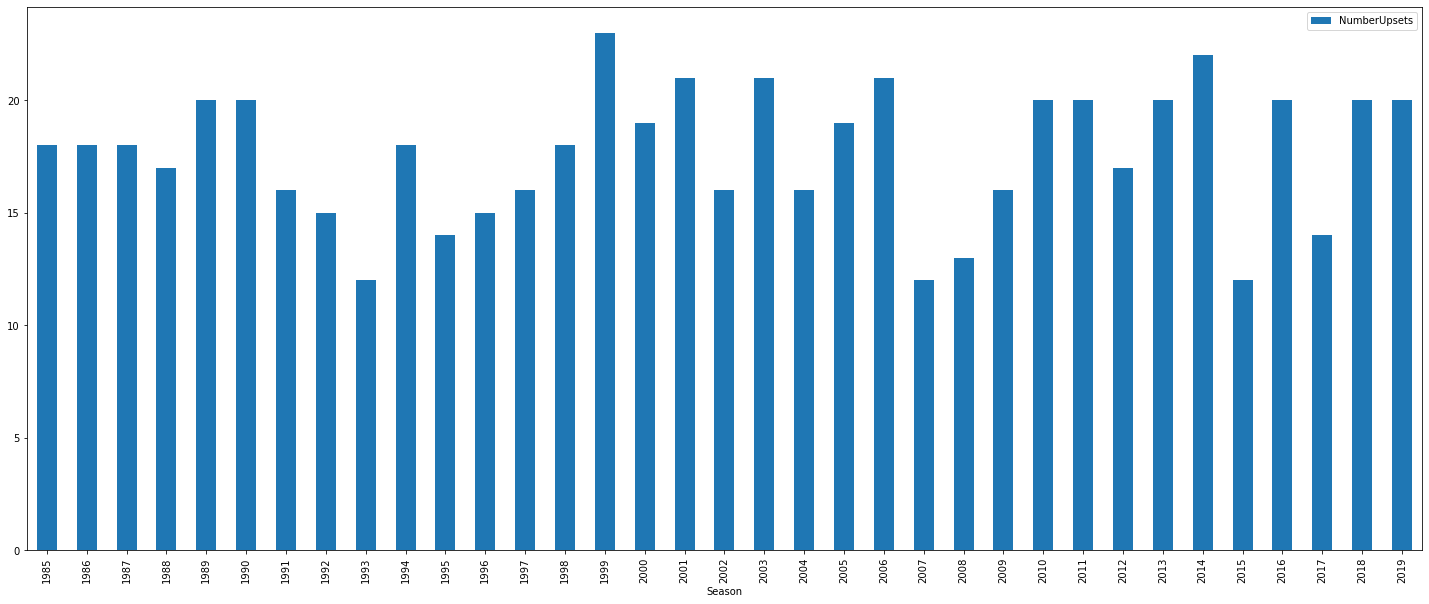

In [65]:
upsets_by_year.plot(x='Season', y='NumberUpsets', kind='bar', figsize=(25,10))

In [67]:
upset_first_round = run_query(
'''
SELECT
    WSeed,
    LSeed,
    COUNT(WSeed) TimesUpset
FROM upsets
WHERE DayNum = 136 OR DayNum = 137
GROUP BY 1 ORDER BY 1 DESC
''')
upset_first_round['Percentage'] = upset_first_round['TimesUpset']/136 
upset_first_round

,WSeed,LSeed,TimesUpset,Percentage
0,16,1,1,0.007353
1,15,2,8,0.058824
2,14,3,21,0.154412
3,13,4,29,0.213235
4,12,5,50,0.367647
5,11,6,52,0.382353
6,10,7,55,0.404412
7,9,8,72,0.529412


In [68]:
second_round_upsets = run_query(
'''
SELECT
    WSeed,
    LSeed,
    COUNT(WSeed) NumberUpsets
FROM upsets
WHERE DayNum = 138 or DayNum = 139
GROUP BY 1,2
'''
)
second_round_upsets['Percentage'] = second_round_upsets['NumberUpsets']/136
second_round_upsets



,WSeed,LSeed,NumberUpsets,Percentage
0,5,4,33,0.242647
1,6,3,28,0.205882
2,7,2,25,0.183824
3,8,1,13,0.095588
4,9,1,6,0.044118
5,10,2,18,0.132353
6,11,3,17,0.125000
7,12,4,12,0.088235
8,13,5,3,0.022059
9,13,12,3,0.022059


**The next statistic I wanted to add was Points per possesion. The equation I used to determine possession is stated below.** 
### Possessions = field goal attempts – offensive rebounds + turnovers + (0.475 x free throw attempts)

In [69]:
APP = run_query(
'''

WITH

    first AS (
        SELECT 
            *,
            CAST(WFGA AS float) - CAST(WOR AS float) + CAST(WTO AS float) + (.475 * CAST(WFTA AS float)) WPossessions,
            CAST(LFGA AS float) - CAST(LOR AS float) + CAST(LTO AS float) + (.475 * CAST(LFTA AS float)) LPossessions
        FROM reg_detailed
        ),
    
    second as (
        SELECT 
            Season,
            WTeamID,
            AVG(WScore) AvgWScore,
            AVG(WPossessions) Winning,
            AVG(WScore)/AVG(WPossessions) WPointsPerPoss
        FROM first 
        GROUP BY 1,2 ORDER BY 1
        ),
        
    third AS (
        SELECT
            Season,
            LTeamID,
            AVG(LScore) AvgLScore,
            AVG(LPossessions) Losing,
            AVG(LScore)/AVG(LPossessions) LPointsPerPoss
        FROM first
        GROUP BY 1,2 ORDER BY 1
        ),
        
    fourth AS (
        SELECT
            s.Season,
            s.WTeamID TeamID,
            te.TeamName,
            s.Winning,
            t.Losing,
            (s.Winning + t.Losing)/2 AvgPoss,
            (s.AvgWScore + t.AvgLScore)/2 AvgPoints,
            (s.AvgWScore + t.AvgLScore)/(s.Winning + t.Losing) AvgPointsPerPoss
        FROM second s
        LEFT JOIN third t ON s.WTeamID = t.LTeamID AND s.Season = t.Season
        INNER JOIN teams te ON te.TeamID = s.WTeamID
        WHERE s.Season = 2019 or s.Season = 2018 or s.Season = 2017 or s.Season = 2016 or s.Season = 2015
        ORDER BY 1
        )
        
    SELECT * FROM fourth
'''
)
APP['AvgPointsPerPoss'].loc[137] = 1.135870 #Once again with Kentucky having no losses in 2015, producted NaN value.
APP.head(10)

,Season,TeamID,TeamName,Winning,Losing,AvgPoss,AvgPoints,AvgPointsPerPoss
0,2015,1101,Abilene Chr,66.421429,64.003571,65.212500,66.476190,1.019378
1,2015,1102,Air Force,59.410417,62.336765,60.873591,65.487745,1.075799
2,2015,1103,Akron,64.940000,64.942857,64.941429,66.828571,1.029059
3,2015,1104,Alabama,63.151471,63.625000,63.388235,66.525210,1.049488
4,2015,1105,Alabama A&M,65.725000,64.368750,65.046875,64.612500,0.993322
5,2015,1106,Alabama St,69.000000,70.362500,69.681250,69.652941,0.999594
6,2015,1107,SUNY Albany,60.670833,63.362500,62.016667,63.208333,1.019215
7,2015,1108,Alcorn St,68.540000,67.648000,68.094000,68.740000,1.009487
8,2015,1110,American Univ,58.320588,56.957812,57.639200,58.560662,1.015987
9,2015,1111,Appalachian St,64.991667,67.391176,66.191422,64.306373,0.971521


In [70]:
APP.to_sql('points_per_poss',conn)

***
**Next I wanted to look at the events datasets. These are datasets that contain every single event that happened in every game during the regular season which results to several million rows of data. Using only certain events for those games, I created a score for each team. I compared these with the seed rankings for several years and it actually matches up quite well. Using SQL for this estimate was a huge time saver. Last year I used a FOR loop in python to accumulate the scores for each and it would 15 - 30 minutes to run the code. With SQL, less than 1 minute.**
***

In [ ]:
events2015 = events2015[events2015['EventType'].isin(['reb', 'made2', 'assist', 'steal','made3', 'made1', 'block'])]
events2016 = events2016[events2016['EventType'].isin(['reb', 'made2', 'assist', 'steal','made3', 'made1', 'block'])]
events2017 = events2017[events2017['EventType'].isin(['reb', 'made2', 'assist', 'steal','made3', 'made1', 'block'])]
events2018 = events2018[events2018['EventType'].isin(['reb', 'made2', 'assist', 'steal','made3', 'made1', 'block'])]
events2019 = events2019[events2019['EventType'].isin(['reb', 'made2', 'assist', 'steal','made3', 'made1', 'block'])]
events = pd.concat([events2015,events2016,events2017,events2018,events2019])
events.to_sql('events', conn)

In [76]:
run_command(
'''
CREATE VIEW scores AS
SELECT
    e.Season,
    e.EventTeamID TeamID,
    t.TeamName,
    COUNT(e.EventTeamID) Score
FROM events e
INNER JOIN teams t ON t.TeamID = e.EventTeamID
GROUP BY 1,2
''')

In [77]:
run_query(
'''
SELECT * FROM scores_1 LIMIT 10
''')

,Season,TeamID,TeamName,Score
0,2015,1101,Abilene Chr,2259
1,2015,1102,Air Force,2588
2,2015,1103,Akron,3295
3,2015,1104,Alabama,3092
4,2015,1105,Alabama A&M,2610
5,2015,1106,Alabama St,2854
6,2015,1107,SUNY Albany,2994
7,2015,1108,Alcorn St,2716
8,2015,1110,American Univ,2627
9,2015,1111,Appalachian St,2598


***
**The next feature I wanted to look at was not just how many wins and losses each team had but how much they won by and how much they lost by. I did that by creating a score using the avg points won by and lost by for all teams for that season. Below is the equation I used.**

### Calc = (AvgPointsWonBy - YearAvg) + (YearAvg - AvgPointsLostBy)
***

In [71]:
reg_detailed_2015 = reg_detailed[reg_detailed['Season'] == 2015] 
reg_detailed_2016 = reg_detailed[reg_detailed['Season'] == 2016]
reg_detailed_2017 = reg_detailed[reg_detailed['Season'] == 2017]
reg_detailed_2018 = reg_detailed[reg_detailed['Season'] == 2018]
reg_detailed_2019 = reg_detailed[reg_detailed['Season'] == 2019]
reg_detailed_2015['AvgPointsWonBy'] = reg_detailed_2015['WScore'] - reg_detailed_2015['LScore']
reg_detailed_2016['AvgPointsWonBy'] = reg_detailed_2016['WScore'] - reg_detailed_2016['LScore']
reg_detailed_2017['AvgPointsWonBy'] = reg_detailed_2017['WScore'] - reg_detailed_2017['LScore']
reg_detailed_2018['AvgPointsWonBy'] = reg_detailed_2018['WScore'] - reg_detailed_2018['LScore']
reg_detailed_2019['AvgPointsWonBy'] = reg_detailed_2019['WScore'] - reg_detailed_2019['LScore']
avg_2015 = reg_detailed_2015['AvgPointsWonBy'].mean()
avg_2016 = reg_detailed_2016['AvgPointsWonBy'].mean()
avg_2017 = reg_detailed_2017['AvgPointsWonBy'].mean()
avg_2018 = reg_detailed_2018['AvgPointsWonBy'].mean()
avg_2019 = reg_detailed_2019['AvgPointsWonBy'].mean()

In [72]:
reg_detail_full = pd.concat([reg_detailed_2015,reg_detailed_2016,reg_detailed_2017,reg_detailed_2018,reg_detailed_2019]).reset_index(drop=True)
reg_detail_full.to_sql('reg_detail',conn) #This combines all years together and creates a table

In [73]:
calc = run_query(
'''

WITH
first as (
        SELECT
            r.Season,
            r.WTeamID WTeamID,
            t.TeamName WTeamName,
            AVG(r.AvgPointsWonBy) AvgPointsWonBy
        FROM reg_detail r
        INNER JOIN teams t on t.TeamID = r.WTeamID
        GROUP BY 1,2 ORDER BY 1
    ),
    
    second AS (
        SELECT
            r.Season,
            r.LTeamID LTeamID,
            t.TeamName LTeamName,
            AVG(r.AvgPointsWonBy) AvgPointsLostBy
        FROM reg_detail r
        INNER JOIN teams t on t.TeamID = r.LTeamID
        GROUP BY 1,2 ORDER BY 1
        ),
    
    third AS (
        SELECT 
            f.*,
            s.AvgPointsLostBy
        FROM first f
        LEFT JOIN second s ON s.LTeamID = f.WTeamID AND f.Season = s.Season
        ),
        
    fourth AS(
        SELECT
            Season,
            AVG(AvgPointsWonBy) YearAvg
        FROM reg_detail
        GROUP BY 1
    ),
    
    fifth AS (
    SELECT 
        t.*,
        (t.AvgPointsWonBy - f.YearAvg) + (f.YearAvg - t.AvgPointsLostBy) Calc
    FROM third t
    LEFT JOIN fourth f ON t.Season = f.Season
    )
    
    SELECT * FROM fifth
'''
)

calc['AvgPointsLostBy'].loc[137] = 0      #Once again, Kentucky not having losses
calc['Calc'].loc[137] = 20.941176         #Once again, Kentucky not having losses 
calc.head()

,Season,WTeamID,WTeamName,AvgPointsWonBy,AvgPointsLostBy,Calc
0,2015,1101,Abilene Chr,12.142857,18.523810,-6.380952
1,2015,1102,Air Force,13.666667,11.588235,2.078431
2,2015,1103,Akron,11.900000,7.000000,4.900000
3,2015,1104,Alabama,10.352941,7.857143,2.495798
4,2015,1105,Alabama A&M,9.000000,14.000000,-5.000000


In [74]:
calc.to_sql('calc',conn)

***
**Lastly, there are many statistics based on the teams performance but there is no way to assess the competition. If a team won by 20 points each time but played horrible teams, it is very misleading. I had to go outside of the provided datasets by Kaggle for this. KenPom.com has this statistic, strength of schedule. But it took quite a bit of cleaning up to make the dataset compatible with the ones I was using.**
***


In [75]:
pom_15 = pd.read_csv('/Users/martinacoyne/Downloads/pom_2015.csv')
pom_16 = pd.read_csv('/Users/martinacoyne/Downloads/pom_2016.csv')
pom_17 = pd.read_csv('/Users/martinacoyne/Downloads/pom_2017.csv')
pom_18 = pd.read_csv('/Users/martinacoyne/Downloads/pom_2018.csv')
pom_19 = pd.read_csv('/Users/martinacoyne/Downloads/pom_2019.csv')
pom_15['Season'] = 2015
pom_16['Season'] = 2016
pom_17['Season'] = 2017
pom_18['Season'] = 2018
pom_19['Season'] = 2019
pom = pd.concat([pom_15,pom_16,pom_17,pom_18,pom_19]).reset_index(drop=True)
pom = pom.rename(columns={'AdjEM.1': 'SchedStrength'})

In [76]:
pom.head()

,Rk,Team,Conf,W-L,AdjEM,AdjO,Unnamed: 6,AdjD,Unnamed: 8,AdjT,Unnamed: 10,Luck,Unnamed: 12,SchedStrength,Unnamed: 14,OppO,Unnamed: 16,OppD,Unnamed: 18,AdjEM.2,Unnamed: 20,Season
0,12,Kansas 2,B12,27-9,22.72,114.5,27,91.8,9,67.0,56,0.070,33,13.17,1,110.6,3,97.4,1,9.57,8,2015
1,10,North Carolina 4,ACC,26-12,23.85,119.1,11,95.3,37,69.2,16,-0.026,244,12.76,2,111.1,1,98.3,3,7.64,15,2015
2,3,Duke 1,ACC,35-4,32.48,124.5,3,92.0,11,65.8,104,0.067,38,11.17,3,110.7,2,99.5,17,1.31,117,2015
3,2,Wisconsin 1,B10,36-4,33.72,129.0,1,95.2,35,58.7,345,0.015,146,11.03,4,109.8,9,98.8,7,5.30,29,2015
4,11,Oklahoma 3,B12,24-11,22.80,112.5,46,89.7,7,66.7,63,-0.045,285,11.00,5,110.2,8,99.2,9,1.05,123,2015


In [77]:
#the names of the teams must cleaned up so that we can combine the POM dataset with our current datasets

for each in range(len(pom)):
    a = pom['Team'].loc[each]
    b = a[:-2]
    if a[-1] in ['0','1','2','3','4','5','6','7','8','9']:
        pom['Team'].loc[each] = b
    else: 
        pass
for each in range(len(pom)):
    a = pom['Team'].loc[each]
    b = a[:-1]
    if a[-1] in [' ']:
        pom['Team'].loc[each] = b
    else: 
        pass
for each in range(len(pom)):
    a = pom['Team'].loc[each]
    b = a[:-1]
    if a[-1] in ['.']:
        pom['Team'].loc[each] = b
    else: 
        pass

In [78]:
#Now that we have the names cleaned up, we have to make sure they all match. I will correct this with a dictionary
#and using the map() function

mapping_dict2 = {
 'Abilene Christian':'Abilene Chr',
 'Albany':'SUNY Albany',
 'Arkansas Little Rock':'Ark Little Rock',
 'Cal St. Bakersfield':'CS Bakersfield',
 'Cal St. Fullerton':'CS Fullerton',
 'Coastal Carolina':'Coastal Car',
 'College of Charleston':'Col Charleston',
 'East Tennessee St':'ETSU',
 'Eastern Washington':'E Washington',
 'Fairleigh Dickinson':'F Dickinson',
 'Florida Gulf Coast':'FL Gulf Coast',
 'Green Bay':'WI Green Bay',
 'Kent St':'Kent',
 'Loyola Chicago':'Loyola-Chicago',
 'Middle Tennessee':'MTSU',
 "Mount St. Mary's":"Mt St Mary's",
 'N.C. State':'NC State',
 'North Carolina Central':'NC Central',
 'North Dakota St':'N Dakota St',
 'Northern Kentucky':'N Kentucky',
 'Prairie View A&M':'Prairie View',
 "Saint Joseph's":"St Joseph's PA",
 'Saint Louis':'St Louis',
 "Saint Mary's":"St Mary's CA",
 'South Dakota St':'S Dakota St',
 'Southern':'Southern Univ',
 'St. Bonaventure':'St Bonaventure',
 "St. John's": "St John's",
 'Stephen F. Austin':'SF Austin',
 'Texas Southern':'TX Southern'
 }

In [79]:
for each in range(len(pom)): #now use this mapping dict to get all the names correct.
    a = pom['Team'].loc[each]
    if a in mapping_dict2.keys():
        pom['Team'].loc[each] = mapping_dict2[a]
    else:
        pass

In [80]:
pom.to_sql('pom',conn)

In [81]:
run_query(
'''
SELECT * FROM pom LIMIT 10
'''
)

,index,Rk,Team,Conf,W-L,AdjEM,AdjO,Unnamed: 6,AdjD,Unnamed: 8,AdjT,Unnamed: 10,Luck,Unnamed: 12,SchedStrength,Unnamed: 14,OppO,Unnamed: 16,OppD,Unnamed: 18,AdjEM.2,Unnamed: 20,Season
0,0,12,Kansas,B12,27-9,22.72,114.5,27,91.8,9,67.0,56,0.070,33,13.17,1,110.6,3,97.4,1,9.57,8,2015
1,1,10,North Carolina,ACC,26-12,23.85,119.1,11,95.3,37,69.2,16,-0.026,244,12.76,2,111.1,1,98.3,3,7.64,15,2015
2,2,3,Duke,ACC,35-4,32.48,124.5,3,92.0,11,65.8,104,0.067,38,11.17,3,110.7,2,99.5,17,1.31,117,2015
3,3,2,Wisconsin,B10,36-4,33.72,129.0,1,95.2,35,58.7,345,0.015,146,11.03,4,109.8,9,98.8,7,5.30,29,2015
4,4,11,Oklahoma,B12,24-11,22.80,112.5,46,89.7,7,66.7,63,-0.045,285,11.00,5,110.2,8,99.2,9,1.05,123,2015
5,5,16,Iowa St,B12,25-9,21.49,119.0,12,97.5,59,69.6,10,0.005,173,10.59,6,109.0,18,98.5,4,-1.18,192,2015
6,6,15,Michigan St,B10,27-12,21.72,116.6,14,94.9,27,63.1,248,-0.017,222,10.49,7,110.3,7,99.8,20,-0.88,184,2015
7,7,38,Oklahoma St,B12,18-14,14.92,111.8,51,96.8,53,63.3,238,-0.045,287,10.42,8,108.2,41,97.8,2,-1.65,208,2015
8,8,81,Kansas St,B12,15-17,8.18,106.6,120,98.4,68,62.1,285,0.010,158,10.32,9,108.9,23,98.6,5,-1.28,197,2015
9,9,21,Xavier,BE,23-14,19.49,116.6,15,97.1,56,65.0,137,-0.062,317,10.29,10,109.5,12,99.2,10,2.07,94,2015


***
**Now I have all the data points I want for the different teams in the different seasons but in order to create the ML algorithm, it has to be in right order for which team played which for all the seasons 2015 - 2019. This is actually quite complicated to do with how datasets are arranged. Thus, I wrote a function in python to help do all the leg work arranging it for all the different seasons.**
***

In [82]:
def make_tourney_bracket(year):   
    compact = compact_results[compact_results['Season'] == year].reset_index(drop=True)
    seeds = tourney_seeds_1[tourney_seeds_1['Season'] == year]
    slots = tourney_slots[tourney_slots['Season'] == year]
    slots['Winner'] = slots['WeakSeed']
    slots['DayNum'] = 2020

    seedsDict = {}
    for each in seeds.index:
        a = seeds['Seed'].loc[each]
        b = seeds['TeamID'].loc[each]
        seedsDict[a] = b

    prelim = slots.iloc[63:]
    round1 = slots.iloc[0:32]
    round2 = slots.iloc[32:48]
    round3 = slots.iloc[48:56]
    round4 = slots.iloc[56:60]
    round5 = slots.iloc[60:62]
    round6 = slots.iloc[62]

    prelim['StrongSeed'] = prelim['StrongSeed'].map(seedsDict)
    prelim['WeakSeed'] = prelim['WeakSeed'].map(seedsDict)

    prelimWinners = compact['WTeamID'].loc[:4].tolist()
    winPrelim = {}

    for each in prelim.index:
        prelim['DayNum'].loc[each] = 134
        a = prelim['StrongSeed'].loc[each]
        b = prelim['WeakSeed'].loc[each]
        c = prelim['Slot'].loc[each]
        if a in prelimWinners:
            winPrelim[c] = a
            prelim['Winner'].loc[each] = a
        else:
            winPrelim[c] = b
            prelim['Winner'].loc[each] = b

    seedsDict.update(winPrelim)

    round1['StrongSeed'] = round1['StrongSeed'].map(seedsDict)
    round1['WeakSeed'] = round1['WeakSeed'].map(seedsDict)

    round1Winners = compact['WTeamID'].loc[4:35].tolist()
    winDict1 = {}

    for each in round1.index:
        round1['DayNum'].loc[each] = 136
        a = round1['StrongSeed'].loc[each]
        b = round1['WeakSeed'].loc[each]
        c = round1['Slot'].loc[each]
        if a in round1Winners:
            winDict1[c] = a
            round1['Winner'].loc[each] = a
        else:
            winDict1[c] = b
            round1['Winner'].loc[each] = b

    round2['StrongSeed'] = round2['StrongSeed'].map(winDict1)
    round2['WeakSeed'] = round2['WeakSeed'].map(winDict1)

    round2Winners = compact['WTeamID'].loc[36:51].tolist()
    winDict2 = {}

    for each in round2.index:
        round2['DayNum'].loc[each] = 138
        a = round2['StrongSeed'].loc[each]
        b = round2['WeakSeed'].loc[each]
        c = round2['Slot'].loc[each]
        if a in round2Winners:
            winDict2[c] = a
            round2['Winner'].loc[each] = a
        else:
            winDict2[c] = b
            round2['Winner'].loc[each] = b

    round3['StrongSeed'] = round3['StrongSeed'].map(winDict2)
    round3['WeakSeed'] = round3['WeakSeed'].map(winDict2)

    round3Winners = compact['WTeamID'].loc[52:59].tolist()
    winDict3 = {}

    for each in round3.index:
        round3['DayNum'].loc[each] = 143
        a = round3['StrongSeed'].loc[each]
        b = round3['WeakSeed'].loc[each]
        c = round3['Slot'].loc[each]
        if a in round3Winners:
            winDict3[c] = a
            round3['Winner'].loc[each] = a
        else:
            winDict3[c] = b
            round3['Winner'].loc[each] = b

    round4['StrongSeed'] = round4['StrongSeed'].map(winDict3)
    round4['WeakSeed'] = round4['WeakSeed'].map(winDict3)

    round4Winners = compact['WTeamID'].loc[60:63].tolist()
    winDict4 = {}

    for each in round4.index:
        round4['DayNum'].loc[each] = 145
        a = round4['StrongSeed'].loc[each]
        b = round4['WeakSeed'].loc[each]
        c = round4['Slot'].loc[each]
        if a in round4Winners:
            winDict4[c] = a
            round4['Winner'].loc[each] = a
        else:
            winDict4[c] = b
            round4['Winner'].loc[each] = b

    round5['StrongSeed'] = round5['StrongSeed'].map(winDict4)
    round5['WeakSeed'] = round5['WeakSeed'].map(winDict4)

    round5Winners = compact['WTeamID'].loc[64:66].tolist()
    winDict5 = {}

    for each in round5.index:
        round5['DayNum'].loc[each] = 152
        a = round5['StrongSeed'].loc[each]
        b = round5['WeakSeed'].loc[each]
        c = round5['Slot'].loc[each]
        if a in round5Winners:
            winDict5[c] = a
            round5['Winner'].loc[each] = a
        else:
            winDict5[c] = b
            round5['Winner'].loc[each] = b


    round6['StrongSeed'] = winDict5['R5WX']
    round6['WeakSeed'] = winDict5['R5YZ']
    a = compact.index[-1]
    round6Winners = compact['WTeamID'].loc[a]

    total = pd.concat([prelim,round1,round2,round3,round4,round5])

    return total

**Then I will execute the function for each year and add them all together to make one table.**

In [83]:
tourn2015 = make_tourney_bracket(2015)
tourn2016 = make_tourney_bracket(2016)
tourn2017 = make_tourney_bracket(2017)
tourn2018 = make_tourney_bracket(2018)
tourn2019 = make_tourney_bracket(2019)
thetourney = pd.concat([tourn2015,tourn2016,tourn2017,tourn2018,tourn2019])

In [96]:
thetourney.head()

,Season,Slot,StrongSeed,WeakSeed,Winner,DayNum
1979,2015,W11,1129,1173,1173,134
1980,2015,X16,1316,1352,1352,134
1981,2015,Y16,1214,1264,1214,134
1982,2015,Z11,1140,1279,1279,134
1916,2015,R1W1,1437,1248,1437,136


In [103]:
thetourney.Winner = thetourney.Winner.astype(int)

In [104]:
run_command(
'''
drop table thetourney
'''
)

In [105]:
thetourney.to_sql('thetourney',conn)

In [13]:
run_query('select * from seeds')

,index,Season,Seed,TeamID
0,0,2021,1,1276
1,1,2021,2,1104
2,2,2021,3,1400
3,3,2021,4,1199
4,4,2021,5,1160
5,5,2021,6,1140
6,6,2021,7,1163
7,7,2021,8,1261
8,8,2021,9,1382
9,9,2021,10,1268


***
**OK, so now I have all my data points a table with the correct structure to add them to. Time to add them all together. SQL is brilliant for this type of task. I also added a column using CASE which determines if the strong team was in fact the winner. This column will be used in the prediction.**
***

In [195]:
ultimate = run_query(
'''
WITH
    
    first AS(
        SELECT
            tt.Season,
            tt.DayNum,
            tt.StrongSeed StrongTeamID,
            t.TeamName StrongName,
            se.Seed StrongSeed,
            tt.WeakSeed,
            tt.Winner
        FROM thetourney tt
        INNER JOIN teams t ON t.TeamID = tt.StrongSeed
        INNER JOIN seeds se ON tt.StrongSeed = se.TeamID AND tt.Season = se.Season
        GROUP BY 1,2,3
        ),

    second AS(
        SELECT
            f.Season,
            f.DayNum,
            f.StrongTeamID,
            f.StrongName,
            f.StrongSeed,
            f.WeakSeed WeakTeamID,
            t.TeamName WeakName,
            se.Seed WeakSeed,
            f.Winner
        FROM first f
        INNER JOIN teams t ON t.TeamID = f.WeakSeed
        INNER JOIN seeds se ON f.WeakSeed = se.TeamID AND f.Season = se.Season
        GROUP BY 1,2,3
        ),
        
    third AS (
     
        SELECT
            s.Season,
            s.DayNum,
            s.StrongTeamID,
            s.StrongName,
            s.StrongSeed,
            c.Calc StrongCalc,
            --sc.Score StrongScore,
            p.AvgPointsPerPoss StrongAvgPPP,
            t.Total StrongTotal,
            r.Record StrongRecord,
            pom.SchedStrength StrongStrength,
            s.WeakTeamID,
            s.WeakName,
            s.WeakSeed,
            s.Winner
        FROM second s
        LEFT JOIN calc c ON s.StrongTeamID = c.WTeamID AND s.Season = c.Season
        LEFT JOIN scores_1 sc ON s.StrongTeamID = sc.TeamID AND s.Season = sc.Season
        LEFT JOIN points_per_poss p ON p.TeamID = s.StrongTeamID AND p.Season = s.Season
        LEFT JOIN total t ON s.StrongTeamID = t.TeamID AND s.Season = t.Season
        LEFT JOIN record r ON r.TeamID = s.StrongTeamID AND r.Season = s.Season
        LEFT JOIN pom ON pom.Team = s.StrongName AND s.Season = pom.Season
        ),
    
    fourth AS (
        
        SELECT
            th.Season,
            th.DayNum,
            th.StrongTeamID,
            th.StrongName,
            th.StrongSeed,
            th.StrongCalc,
            --th.StrongScore,
            th.StrongAvgPPP,
            th.StrongTotal,
            th.StrongRecord,
            th.StrongStrength,
            th.WeakTeamID,
            th.WeakName,
            th.WeakSeed,
            c.Calc WeakCalc,
            --sc.Score WeakScore,
            p.AvgPointsPerPoss WeakAvgPPP,
            t.total WeakTotal,
            r.Record WeakRecord,
            pom.SchedStrength WeakStrength,
            th.Winner WinnerID,
            te.TeamName WinnerName,
            CASE
            WHEN th.Winner = th.StrongTeamID THEN 1
            ELSE 0
            END
            AS Outcome
        FROM third th
        LEFT JOIN calc c ON th.WeakTeamID = c.WTeamID AND th.Season = c.Season
        LEFT JOIN scores_1 sc ON th.WeakTeamID = sc.TeamID AND th.Season = sc.Season
        LEFT JOIN points_per_poss p ON p.TeamID = th.WeakTeamID AND p.Season = th.Season
        LEFT JOIN total t ON th.WeakTeamID = t.TeamID AND th.Season = t.Season
        LEFT JOIN record r ON r.TeamID = th.WeakTeamID AND r.Season = th.Season
        LEFT JOIN pom ON pom.Team = th.WeakName AND th.Season = pom.Season
        LEFT JOIN teams te ON th.Winner = te.TeamID
        WHERE th.Season > 2014
    )
    
    select * from fourth
            
'''
)

In [196]:
ultimate

,Season,DayNum,StrongTeamID,StrongName,StrongSeed,StrongCalc,StrongAvgPPP,StrongTotal,StrongRecord,StrongStrength,WeakTeamID,WeakName,WeakSeed,WeakCalc,WeakAvgPPP,WeakTotal,WeakRecord,WeakStrength,WinnerID,WinnerName,Outcome
0,2015,134,1129,Boise St,11,6.989130,1.057379,3.482020,0.74,0.94,1173,Dayton,11,4.285000,1.016311,3.323619,0.76,3.39,1173,Dayton,0
1,2015,134,1140,BYU,11,8.739130,1.124617,3.615138,0.72,3.96,1279,Mississippi,11,6.133333,1.060514,3.525379,0.63,7.1,1279,Mississippi,0
2,2015,134,1214,Hampton,16,-1.003676,0.967981,3.075800,0.48,-7.48,1264,Manhattan,16,1.255061,1.001512,3.292272,0.59,-3.59,1214,Hampton,1
3,2015,134,1316,North Florida,16,3.613636,1.072947,3.474343,0.65,-7.19,1352,Robert Morris,16,-1.229323,1.012544,3.414477,0.58,-4.59,1352,Robert Morris,0
4,2015,136,1112,Arizona,2,16.838710,1.072811,3.436062,0.91,7.37,1411,TX Southern,15,-5.643939,1.000088,3.193491,0.65,-6.74,1112,Arizona,1
5,2015,136,1116,Arkansas,5,3.730769,1.074600,3.417852,0.76,6.09,1459,Wofford,12,-4.897436,1.007567,3.349381,0.81,-3.98,1116,Arkansas,1
6,2015,136,1124,Baylor,3,8.000000,1.045181,3.250241,0.72,10.22,1209,Georgia St,14,6.048309,1.057645,3.465865,0.72,-1.47,1209,Georgia St,0
7,2015,136,1139,Butler,6,7.600000,1.024414,3.274444,0.69,9.72,1400,Texas,11,9.434615,1.049092,3.387251,0.61,9.52,1139,Butler,1
8,2015,136,1153,Cincinnati,8,6.009091,0.994706,3.260828,0.69,3.39,1345,Purdue,9,4.440476,1.049001,3.295749,0.64,7.45,1153,Cincinnati,1
9,2015,136,1181,Duke,1,8.051724,1.127055,3.464230,0.88,11.17,1352,Robert Morris,16,-1.229323,1.012544,3.414477,0.58,-4.59,1181,Duke,1


##### Now I want scale my features so they work more accurately. I want them all to fall in the range: -1 < x < 1. I learned this in the machine learning course by Andrew Ng. I am going to try this out to see how it works. He suggests using the following equation to scale the features:

($x_{i}$ - $u_{i}$) / $s_{i}$

Where:
* x = feature
* u = average value of training set
* s = range (max - min)

- This actually resulted in a significantly worse outcome. I'm not sure if it might help when used on certain features. Yes, very intestesting now that I think about it. Some of them are already between -1 and 1 and I still used it anyway. Let me try it again, only on those columns which it should be done one. Which would be: Seed, Calc, Total, and Strenghth

Nope.. Still sucked... I am scrapping that method for you now

In [197]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Season          330 non-null    int64  
 1   DayNum          330 non-null    int64  
 2   StrongTeamID    330 non-null    int64  
 3   StrongName      330 non-null    object 
 4   StrongSeed      330 non-null    int64  
 5   StrongCalc      330 non-null    float64
 6   StrongAvgPPP    330 non-null    float64
 7   StrongTotal     330 non-null    float64
 8   StrongRecord    330 non-null    float64
 9   StrongStrength  330 non-null    object 
 10  WeakTeamID      330 non-null    int64  
 11  WeakName        330 non-null    object 
 12  WeakSeed        330 non-null    int64  
 13  WeakCalc        330 non-null    float64
 14  WeakAvgPPP      330 non-null    float64
 15  WeakTotal       330 non-null    float64
 16  WeakRecord      330 non-null    float64
 17  WeakStrength    330 non-null    obj

In [89]:
s_max = ultimate.StrongCalc.max()
s_max

20.941176

In [90]:
s_min = ultimate.StrongCalc.min()
s_min

-9.407142857142858

In [91]:
s_mean = ultimate.StrongCalc.mean()
s_mean

7.362370850995508

In [92]:
test = ultimate.StrongCalc.iloc[0]
test

0.3888888888888893

In [56]:
(test - s_mean)/(s_max - s_min)

-0.02478455059151647

In [198]:
ultimate.StrongStrength = ultimate.StrongStrength.astype(float)
ultimate.WeakStrength = ultimate.WeakStrength.astype(float)

In [93]:
features = ['StrongSeed','StrongCalc', 'StrongTotal',
       'StrongStrength',
       'WeakCalc', 'WeakTotal',
       'WeakStrength']

In [95]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1086 entries, 0 to 1097
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Season          1086 non-null   int64  
 1   DayNum          1086 non-null   int64  
 2   StrongTeamID    1086 non-null   int64  
 3   StrongName      1086 non-null   object 
 4   StrongSeed      1086 non-null   float64
 5   StrongCalc      1086 non-null   float64
 6   StrongAvgPPP    1086 non-null   float64
 7   StrongTotal     1086 non-null   float64
 8   StrongRecord    1086 non-null   float64
 9   StrongStrength  1086 non-null   object 
 10  WeakTeamID      1086 non-null   int64  
 11  WeakName        1086 non-null   object 
 12  WeakSeed        1086 non-null   int64  
 13  WeakCalc        1086 non-null   float64
 14  WeakAvgPPP      1086 non-null   float64
 15  WeakTotal       1086 non-null   float64
 16  WeakRecord      1086 non-null   float64
 17  WeakStrength    1086 non-null   o

In [94]:
for each in features:
    s_min = ultimate[each].min()
    s_max = ultimate[each].max()
    s_range = s_max - s_min
    s_mean = ultimate[each].mean()
    feature_scale = lambda x: (x - s_mean)/s_range
    ultimate[each] = ultimate[each].apply(feature_scale)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [199]:
ultimate = ultimate.dropna()

In [200]:
len(ultimate)

330

In [98]:
ultimate.head()

,Season,DayNum,StrongTeamID,StrongName,StrongSeed,StrongCalc,StrongAvgPPP,StrongTotal,StrongRecord,StrongStrength,WeakTeamID,WeakName,WeakSeed,WeakCalc,WeakAvgPPP,WeakTotal,WeakRecord,WeakStrength,WinnerID,WinnerName,Outcome,Prediction
0,2003,134,1411,TX Southern,0.768815,-0.229781,1.023393,-0.429806,0.60,-12.96,1421,UNC Asheville,16,-11.927885,1.017336,3.506987,0.45,-6.45,1421,UNC Asheville,0,0.0
1,2003,136,1112,Arizona,-0.231185,0.184007,1.037895,-0.052772,0.89,8.69,1436,Vermont,16,2.652632,0.990734,3.203191,0.66,-5.14,1112,Arizona,1,1.0
2,2003,136,1143,California,0.235482,-0.234162,1.031611,-0.069366,0.72,7.06,1301,NC State,9,3.472222,1.052984,3.577649,0.60,8.48,1143,California,1,1.0
3,2003,136,1153,Cincinnati,0.235482,-0.009121,1.014404,-0.249632,0.61,7.32,1211,Gonzaga,9,7.798913,1.085424,3.479329,0.74,3.92,1211,Gonzaga,0,0.0
4,2003,136,1163,Connecticut,0.035482,-0.037046,1.046670,-0.076472,0.70,8.75,1140,BYU,12,6.527174,1.062294,3.580709,0.74,5.49,1163,Connecticut,1,1.0


In [132]:
ultimate.describe()

,Season,DayNum,StrongTeamID,StrongSeed,StrongCalc,StrongScore,StrongAvgPPP,StrongTotal,StrongRecord,StrongStrength,WeakTeamID,WeakSeed,WeakCalc,WeakScore,WeakAvgPPP,WeakTotal,WeakRecord,WeakStrength,WinnerID,Outcome
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,2017.000000,138.242424,1292.600000,4.563636,7.686361,3707.363636,1.077930,3.462327,0.777848,8.417000,1304.878788,9.800000,4.573829,3515.690909,1.056235,3.414148,0.709303,4.308818,1301.469697,0.660606
std,1.416361,3.851580,102.817263,3.707039,4.850360,294.345043,0.040998,0.140064,0.099619,4.616421,103.894925,4.142155,4.655199,261.804926,0.039820,0.137945,0.097808,6.374040,101.996606,0.474223
min,2015.000000,134.000000,1112.000000,1.000000,-7.190476,3008.000000,0.957559,3.046263,0.420000,-12.780000,1101.000000,1.000000,-7.350000,2671.000000,0.936741,2.937473,0.420000,-11.840000,1104.000000,0.000000
25%,2016.000000,136.000000,1211.000000,2.000000,4.587500,3470.000000,1.053595,3.373650,0.710000,7.302500,1222.000000,7.000000,1.340741,3346.250000,1.024379,3.311817,0.632500,-1.372500,1222.000000,0.000000
50%,2017.000000,136.000000,1277.000000,4.000000,7.834483,3736.000000,1.082333,3.466142,0.780000,9.755000,1316.500000,10.500000,4.532609,3498.000000,1.056201,3.412631,0.710000,5.470000,1294.000000,1.000000
75%,2018.000000,138.000000,1391.750000,7.000000,10.537931,3907.000000,1.104575,3.571093,0.850000,11.237500,1399.000000,13.000000,7.663043,3689.250000,1.083133,3.517315,0.780000,10.277500,1400.000000,1.000000
max,2019.000000,152.000000,1462.000000,16.000000,20.941176,4317.000000,1.160672,3.744968,1.000000,14.130000,1463.000000,16.000000,17.259615,4252.000000,1.153535,3.748447,0.970000,14.420000,1463.000000,1.000000


***
# Machine Learning Section
***

In [19]:
from sklearn.tree import DecisionTreeRegressor 


**NCAA_features are the designated features for this particular algorithm. The other lines of code set it up according to the features and result.**

In [201]:
ncaa_features = ['StrongSeed',
       'StrongCalc', 'StrongAvgPPP', 'StrongTotal',
       'StrongRecord', 'StrongStrength', 'WeakSeed',
       'WeakCalc', 'WeakAvgPPP', 'WeakTotal', 'WeakRecord',
       'WeakStrength']
y = ultimate.Outcome             #the outcome it is trying to predict    
X = ultimate[ncaa_features]
ncaa_model = DecisionTreeRegressor(random_state=1)
ncaa_model.fit(X,y)
#forest_model.fit(X,y)

DecisionTreeRegressor(random_state=1)

***
**The below code is train the algorithm on other data in order to improve it.**
***

In [202]:
from sklearn.metrics import mean_absolute_error

predicted_ncaa_outcomes = ncaa_model.predict(X)
mean_absolute_error(y, predicted_ncaa_outcomes)

from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

ncaa_model = DecisionTreeRegressor()

ncaa_model.fit(train_X, train_y)

val_predictions = ncaa_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

0.30120481927710846


In [31]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [29]:
for max_leaf_nodes in [5, 50, 500, 5000, 10000, 20000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print(my_mae)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

0.37515414056635116
Max leaf nodes: 5  		 Mean Absolute Error:  0
0.30120481927710846
Max leaf nodes: 50  		 Mean Absolute Error:  0
0.30120481927710846
Max leaf nodes: 500  		 Mean Absolute Error:  0
0.30120481927710846
Max leaf nodes: 5000  		 Mean Absolute Error:  0
0.30120481927710846
Max leaf nodes: 10000  		 Mean Absolute Error:  0
0.30120481927710846
Max leaf nodes: 20000  		 Mean Absolute Error:  0


**And finally the prediction itself**

In [203]:
Z = ultimate[ncaa_features]
prediction = ncaa_model.predict(Z)

ultimate['Prediction'] = prediction

***
**To check the accuracy of it based on the test data. So we can see it predicted the correct team with about 91.5% accurcy.**
***

In [204]:
x = 0
for each in ultimate.index:
    a = ultimate['Outcome'].loc[each]
    b = ultimate['Prediction'].loc[each]
    if a == b:
        x += 1
print(x)
print(x/len(ultimate))

305
0.9242424242424242


***
**Now I will also set up a Random Forest algorithm to compare.**
***

In [208]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=46)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

0.33879518072289155


In [34]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [123]:
for max_leaf_nodes in [5, 50, 500, 5000, 10000, 20000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print(my_mae)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

0.42693040489611844
Max leaf nodes: 5  		 Mean Absolute Error:  0
0.41713151521853453
Max leaf nodes: 50  		 Mean Absolute Error:  0
0.41544117647058826
Max leaf nodes: 500  		 Mean Absolute Error:  0
0.41544117647058826
Max leaf nodes: 5000  		 Mean Absolute Error:  0
0.41544117647058826
Max leaf nodes: 10000  		 Mean Absolute Error:  0
0.41544117647058826
Max leaf nodes: 20000  		 Mean Absolute Error:  0


In [206]:
mae_dict = {}
for i in range(100):
    #train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
    forest_model = RandomForestRegressor(random_state=i)
    forest_model.fit(train_X, train_y)
    melb_preds = forest_model.predict(val_X)
    mae = mean_absolute_error(val_y, melb_preds)
    mae_dict[i] = mae
    #if mae < .33:
    #    break

In [207]:
for key, value in mae_dict.items():
    print(key, value)
    #if value < .343:
    #    print(key, value)

0 0.36096385542168674
1 0.35036144578313255
2 0.3496385542168674
3 0.35265060240963864
4 0.3573493975903614
5 0.34710843373493977
6 0.36783132530120477
7 0.3506024096385542
8 0.36132530120481937
9 0.3490361445783133
10 0.34746987951807234
11 0.34987951807228923
12 0.35120481927710845
13 0.3501204819277109
14 0.3553012048192772
15 0.35433734939759043
16 0.3543373493975904
17 0.3633734939759037
18 0.35180722891566263
19 0.3466265060240964
20 0.3579518072289157
21 0.35204819277108435
22 0.3614457831325301
23 0.3462650602409638
24 0.3648192771084338
25 0.34481927710843374
26 0.35518072289156627
27 0.3545783132530121
28 0.3551807228915662
29 0.363855421686747
30 0.3583132530120482
31 0.35674698795180726
32 0.35855421686746985
33 0.36349397590361454
34 0.34722891566265063
35 0.3497590361445784
36 0.3587951807228916
37 0.3559036144578313
38 0.35228915662650606
39 0.3506024096385542
40 0.35674698795180726
41 0.35602409638554217
42 0.3583132530120482
43 0.35277108433734944
44 0.3478313253012048

In [209]:
Z = ultimate[ncaa_features]
prediction_1 = forest_model.predict(Z)

ultimate['Forrest'] = prediction_1

In [210]:
ultimate.head(15)

,Season,DayNum,StrongTeamID,StrongName,StrongSeed,StrongCalc,StrongAvgPPP,StrongTotal,StrongRecord,StrongStrength,WeakTeamID,WeakName,WeakSeed,WeakCalc,WeakAvgPPP,WeakTotal,WeakRecord,WeakStrength,WinnerID,WinnerName,Outcome,Prediction,Forrest
0,2015,134,1129,Boise St,11,6.989130,1.057379,3.482020,0.74,0.94,1173,Dayton,11,4.285000,1.016311,3.323619,0.76,3.39,1173,Dayton,0,0.0,0.09
1,2015,134,1140,BYU,11,8.739130,1.124617,3.615138,0.72,3.96,1279,Mississippi,11,6.133333,1.060514,3.525379,0.63,7.10,1279,Mississippi,0,0.0,0.59
2,2015,134,1214,Hampton,16,-1.003676,0.967981,3.075800,0.48,-7.48,1264,Manhattan,16,1.255061,1.001512,3.292272,0.59,-3.59,1214,Hampton,1,1.0,0.76
3,2015,134,1316,North Florida,16,3.613636,1.072947,3.474343,0.65,-7.19,1352,Robert Morris,16,-1.229323,1.012544,3.414477,0.58,-4.59,1352,Robert Morris,0,0.0,0.24
4,2015,136,1112,Arizona,2,16.838710,1.072811,3.436062,0.91,7.37,1411,TX Southern,15,-5.643939,1.000088,3.193491,0.65,-6.74,1112,Arizona,1,1.0,0.92
5,2015,136,1116,Arkansas,5,3.730769,1.074600,3.417852,0.76,6.09,1459,Wofford,12,-4.897436,1.007567,3.349381,0.81,-3.98,1116,Arkansas,1,0.0,0.40
6,2015,136,1124,Baylor,3,8.000000,1.045181,3.250241,0.72,10.22,1209,Georgia St,14,6.048309,1.057645,3.465865,0.72,-1.47,1209,Georgia St,0,0.0,0.59
7,2015,136,1139,Butler,6,7.600000,1.024414,3.274444,0.69,9.72,1400,Texas,11,9.434615,1.049092,3.387251,0.61,9.52,1139,Butler,1,0.0,0.22
8,2015,136,1153,Cincinnati,8,6.009091,0.994706,3.260828,0.69,3.39,1345,Purdue,9,4.440476,1.049001,3.295749,0.64,7.45,1153,Cincinnati,1,0.0,0.26
9,2015,136,1181,Duke,1,8.051724,1.127055,3.464230,0.88,11.17,1352,Robert Morris,16,-1.229323,1.012544,3.414477,0.58,-4.59,1181,Duke,1,1.0,1.00


In [27]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Season          330 non-null    int64  
 1   DayNum          330 non-null    int64  
 2   StrongTeamID    330 non-null    int64  
 3   StrongName      330 non-null    object 
 4   StrongSeed      330 non-null    float64
 5   StrongCalc      330 non-null    float64
 6   StrongAvgPPP    330 non-null    float64
 7   StrongTotal     330 non-null    float64
 8   StrongRecord    330 non-null    float64
 9   StrongStrength  330 non-null    float64
 10  WeakTeamID      330 non-null    int64  
 11  WeakName        330 non-null    object 
 12  WeakSeed        330 non-null    float64
 13  WeakCalc        330 non-null    float64
 14  WeakAvgPPP      330 non-null    float64
 15  WeakTotal       330 non-null    float64
 16  WeakRecord      330 non-null    float64
 17  WeakStrength    330 non-null    flo

In [97]:
submission = pd.read_csv('/Users/martinacoyne/Desktop/Andrew Projects/March Madness 2021/ncaam-march-mania-2021/MSampleSubmissionStage1.csv')

In [165]:
submission = sub_2

In [166]:
len(submission)

2278

In [167]:
submission.head()

,ID,Pred
0,2021_1101_1104,0.5
1,2021_1101_1111,0.5
2,2021_1101_1116,0.5
3,2021_1101_1124,0.5
4,2021_1101_1140,0.5


In [168]:
submission['Season'] = 'Year'
submission['Team_1'] = 'Team1'
submission['Team_2'] = 'Team2'

for each in submission.index:
    a = submission['ID'].loc[each]
    b = int(a[5:9])
    c = int(a[10:])
    d = int(a[:4])
    
    submission['Team_1'].iloc[each] = b
    submission['Team_2'].iloc[each] = c
    submission['Season'].iloc[each] = d

In [169]:
submission.head()

,ID,Pred,Season,Team_1,Team_2
0,2021_1101_1104,0.5,2021,1101,1104
1,2021_1101_1111,0.5,2021,1101,1111
2,2021_1101_1116,0.5,2021,1101,1116
3,2021_1101_1124,0.5,2021,1101,1124
4,2021_1101_1140,0.5,2021,1101,1140


In [177]:
run_command('''drop table submission''')
#run_command('''drop table ultimate''')
#run_command('''drop view team_stats''')
submission.to_sql('submission', conn)

In [149]:
submission.to_sql('submission',conn)
ultimate.to_sql('ultimate',conn)

run_command(
'''
CREATE VIEW team_stats AS

WITH
    first AS (
        SELECT 
            Season,
            DayNum,
            StrongTeamID TeamID,
            StrongName TeamName,
            StrongSeed Seed,
            StrongCalc Calc,
            StrongScore Score,
            StrongAvgPPP AvgPPP,
            StrongTotal Total,
            StrongRecord Record,
            StrongStrength Strength
        FROM ultimate
        ),
    
    second AS (
        SELECT
            Season,
            DayNum,
            WeakTeamID TeamID,
            WeakName TeamName,
            WeakSeed Seed,
            WeakCalc Calc,
            WeakScore Score,
            WeakAvgPPP AvgPPP,
            WeakTotal Total,
            WeakRecord Record,
            WeakStrength Strength
        FROM ultimate
    ),
        
    third AS (
        
        SELECT * FROM first
        
        UNION
        
        SELECT * FROM second
    )
    
    SELECT * FROM third
    GROUP BY 1,3
'''
)

In [172]:
run_query(
'''

select * from master_2021
limit 10
'''
)

,index,TeamID,TeamName,BrackSeed,Seed,Calc,AvgPointsPerPoss,Total,Record,Efficiency,Offense,Defense,Strength
0,0,1276,Michigan,R1W1,1,3.450000,1.037967,3.686714,0.83,30.70,119.5,88.8,16.78
1,1,1104,Alabama,R3W2,2,5.875000,0.957435,3.372652,0.80,25.07,111.8,86.7,14.29
2,2,1400,Texas,R2W3,3,5.180451,1.026663,3.387148,0.73,20.65,114.0,93.3,14.12
3,3,1199,Florida St,W04,4,5.979167,1.048134,3.551939,0.73,22.08,116.5,94.4,12.56
4,4,1160,Colorado,R5WX,5,9.500000,1.055379,3.740903,0.73,21.71,114.5,92.8,10.82
5,5,1140,BYU,R1W6,6,3.377193,1.034793,3.536435,0.76,20.94,113.1,92.2,10.28
6,6,1163,Connecticut,W07,7,8.323810,1.031791,3.409044,0.68,21.86,113.6,91.8,12.57
7,7,1261,LSU,W08,8,4.833333,1.082542,3.519193,0.67,19.67,119.9,100.2,13.60
8,8,1382,St Bonaventure,R2W1,9,8.375000,0.989569,3.452795,0.80,20.96,111.5,90.5,8.43
9,9,1268,Maryland,R1W7,10,3.164103,1.017802,3.359818,0.54,18.65,111.0,92.3,17.01


In [178]:
pre_sub = run_query(
'''
WITH
    first AS (
        SELECT 
             
             s.ID,
             --s.Season,
             CAST(SUBSTR(s.ID,6,4) AS int) Team,
             s.Team_1,
             t.TeamName TeamName_1,
             t.Seed Seed_1,
             t.Calc Calc_1,
             -- t.Score Score_1,
             t.AvgPointsPerPoss AvgPPP_1,
             t.Total Total_1,
             t.Record Record_1,
             t.Strength Strength_1,
             s.Team_2,
             s.Pred
         FROM submission s
         LEFT JOIN master_2021 t ON t.TeamId = s.Team_1
        ),
    
    second AS (
        SELECT 
            f.ID,
            --f.Season,
            f.Team,
            f.Team_1,
            f.TeamName_1,
            f.Seed_1,
            f.Calc_1,
            --f.Score_1,
            f.AvgPPP_1,
            f.Total_1,
            f.Record_1,
            f.Strength_1,
            f.Team_2,
            t.TeamName TeamName_2,
            t.Seed Seed_2,
            t.Calc Calc_2,
            -- t.Score Score_2,
            t.AvgPointsPerPoss AvgPPP_2,
            t.Total Total_2,
            t.Record Record_2,
            t.Strength Strength_2,
            f.Pred
        FROM first f
        LEFT JOIN master_2021 t ON t.TeamId = f.Team_2
    
    )
    
    
    SELECT * FROM second
'''
)

pre_sub

,ID,Team,Team_1,TeamName_1,Seed_1,Calc_1,AvgPPP_1,Total_1,Record_1,Strength_1,Team_2,TeamName_2,Seed_2,Calc_2,AvgPPP_2,Total_2,Record_2,Strength_2,Pred
0,2021_1101_1104,1101,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,1104,Alabama,2,5.875000,0.957435,3.372652,0.80,14.29,0.5
1,2021_1101_1111,1101,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,1111,Appalachian St,16,-1.832168,0.987504,3.283918,0.54,-2.92,0.5
2,2021_1101_1116,1101,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,1116,Arkansas,3,5.696970,1.004142,3.459368,0.79,11.28,0.5
3,2021_1101_1124,1101,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,1124,Baylor,1,9.590909,1.066977,3.494797,0.92,9.65,0.5
4,2021_1101_1140,1101,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,1140,BYU,6,3.377193,1.034793,3.536435,0.76,10.28,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2273,2021_1452_1457,1452,1452,West Virginia,3,5.333333,1.053548,3.365015,0.67,14.97,1457,Winthrop,12,11.391304,1.026578,3.331909,0.96,-6.40,0.5
2274,2021_1452_1458,1452,1452,West Virginia,3,5.333333,1.053548,3.365015,0.67,14.97,1458,Wisconsin,9,6.387255,1.016966,3.502461,0.59,18.03,0.5
2275,2021_1455_1457,1455,1455,Wichita St,11,-1.700000,0.950453,3.250688,0.74,9.15,1457,Winthrop,12,11.391304,1.026578,3.331909,0.96,-6.40,0.5
2276,2021_1455_1458,1455,1455,Wichita St,11,-1.700000,0.950453,3.250688,0.74,9.15,1458,Wisconsin,9,6.387255,1.016966,3.502461,0.59,18.03,0.5


In [179]:
pre_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          2278 non-null   object 
 1   Team        2278 non-null   int64  
 2   Team_1      2278 non-null   int64  
 3   TeamName_1  2278 non-null   object 
 4   Seed_1      2278 non-null   int64  
 5   Calc_1      2278 non-null   float64
 6   AvgPPP_1    2278 non-null   float64
 7   Total_1     2278 non-null   float64
 8   Record_1    2278 non-null   float64
 9   Strength_1  2278 non-null   float64
 10  Team_2      2278 non-null   int64  
 11  TeamName_2  2278 non-null   object 
 12  Seed_2      2278 non-null   int64  
 13  Calc_2      2278 non-null   float64
 14  AvgPPP_2    2278 non-null   float64
 15  Total_2     2278 non-null   float64
 16  Record_2    2278 non-null   float64
 17  Strength_2  2278 non-null   float64
 18  Pred        2278 non-null   float64
dtypes: float64(11), int64(5), o

In [180]:
pre_sub_1 = pre_sub

In [181]:
pre_sub_1.head()

,ID,Team,Team_1,TeamName_1,Seed_1,Calc_1,AvgPPP_1,Total_1,Record_1,Strength_1,Team_2,TeamName_2,Seed_2,Calc_2,AvgPPP_2,Total_2,Record_2,Strength_2,Pred
0,2021_1101_1104,1101,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,1104,Alabama,2,5.875000,0.957435,3.372652,0.80,14.29,0.5
1,2021_1101_1111,1101,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,1111,Appalachian St,16,-1.832168,0.987504,3.283918,0.54,-2.92,0.5
2,2021_1101_1116,1101,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,1116,Arkansas,3,5.696970,1.004142,3.459368,0.79,11.28,0.5
3,2021_1101_1124,1101,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,1124,Baylor,1,9.590909,1.066977,3.494797,0.92,9.65,0.5
4,2021_1101_1140,1101,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,1140,BYU,6,3.377193,1.034793,3.536435,0.76,10.28,0.5


In [182]:
for each in pre_sub_1.index:
 
    a = pre_sub_1.iloc[each,2]
    b = pre_sub_1.iloc[each,3]
    c = pre_sub_1.iloc[each,4]
    d = pre_sub_1.iloc[each,5]
    e = pre_sub_1.iloc[each,6]
    f = pre_sub_1.iloc[each,7]
    g = pre_sub_1.iloc[each,8]
    h = pre_sub_1.iloc[each,9]
    
    j = pre_sub_1.iloc[each,10]
    k = pre_sub_1.iloc[each,11]
    l = pre_sub_1.iloc[each,12]
    m = pre_sub_1.iloc[each,13]
    n = pre_sub_1.iloc[each,14]
    o = pre_sub_1.iloc[each,15]
    p = pre_sub_1.iloc[each,16]
    q = pre_sub_1.iloc[each,17]
    
    
    if c > l:
        pre_sub_1.iloc[each,2] = j
        pre_sub_1.iloc[each,3] = k
        pre_sub_1.iloc[each,4] = l
        pre_sub_1.iloc[each,5] = m 
        pre_sub_1.iloc[each,6] = n
        pre_sub_1.iloc[each,7] = o
        pre_sub_1.iloc[each,8] = p
        pre_sub_1.iloc[each,9] = q

        pre_sub_1.iloc[each,10] = a
        pre_sub_1.iloc[each,11] = b
        pre_sub_1.iloc[each,12] = c
        pre_sub_1.iloc[each,13] = d
        pre_sub_1.iloc[each,14] = e
        pre_sub_1.iloc[each,15] = f
        pre_sub_1.iloc[each,16] = g
        pre_sub_1.iloc[each,17] = h
        

In [183]:
pre_sub_1

,ID,Team,Team_1,TeamName_1,Seed_1,Calc_1,AvgPPP_1,Total_1,Record_1,Strength_1,Team_2,TeamName_2,Seed_2,Calc_2,AvgPPP_2,Total_2,Record_2,Strength_2,Pred
0,2021_1101_1104,1101,1104,Alabama,2,5.875000,0.957435,3.372652,0.80,14.29,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,0.5
1,2021_1101_1111,1101,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,1111,Appalachian St,16,-1.832168,0.987504,3.283918,0.54,-2.92,0.5
2,2021_1101_1116,1101,1116,Arkansas,3,5.696970,1.004142,3.459368,0.79,11.28,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,0.5
3,2021_1101_1124,1101,1124,Baylor,1,9.590909,1.066977,3.494797,0.92,9.65,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,0.5
4,2021_1101_1140,1101,1140,BYU,6,3.377193,1.034793,3.536435,0.76,10.28,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2273,2021_1452_1457,1452,1452,West Virginia,3,5.333333,1.053548,3.365015,0.67,14.97,1457,Winthrop,12,11.391304,1.026578,3.331909,0.96,-6.40,0.5
2274,2021_1452_1458,1452,1452,West Virginia,3,5.333333,1.053548,3.365015,0.67,14.97,1458,Wisconsin,9,6.387255,1.016966,3.502461,0.59,18.03,0.5
2275,2021_1455_1457,1455,1455,Wichita St,11,-1.700000,0.950453,3.250688,0.74,9.15,1457,Winthrop,12,11.391304,1.026578,3.331909,0.96,-6.40,0.5
2276,2021_1455_1458,1455,1458,Wisconsin,9,6.387255,1.016966,3.502461,0.59,18.03,1455,Wichita St,11,-1.700000,0.950453,3.250688,0.74,9.15,0.5


In [184]:
pre_sub_features =['Seed_1', 'Calc_1',
       'AvgPPP_1', 'Total_1', 'Record_1', 'Strength_1',
       'Seed_2', 'Calc_2', 'AvgPPP_2', 'Total_2', 'Record_2',
       'Strength_2']

In [185]:
Q = pre_sub_1[pre_sub_features]
prediction = ncaa_model.predict(Q)

pre_sub_1['Pred'] = prediction

In [186]:
pre_sub_1

,ID,Team,Team_1,TeamName_1,Seed_1,Calc_1,AvgPPP_1,Total_1,Record_1,Strength_1,Team_2,TeamName_2,Seed_2,Calc_2,AvgPPP_2,Total_2,Record_2,Strength_2,Pred
0,2021_1101_1104,1101,1104,Alabama,2,5.875000,0.957435,3.372652,0.80,14.29,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,1.0
1,2021_1101_1111,1101,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,1111,Appalachian St,16,-1.832168,0.987504,3.283918,0.54,-2.92,0.0
2,2021_1101_1116,1101,1116,Arkansas,3,5.696970,1.004142,3.459368,0.79,11.28,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,1.0
3,2021_1101_1124,1101,1124,Baylor,1,9.590909,1.066977,3.494797,0.92,9.65,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,1.0
4,2021_1101_1140,1101,1140,BYU,6,3.377193,1.034793,3.536435,0.76,10.28,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2273,2021_1452_1457,1452,1452,West Virginia,3,5.333333,1.053548,3.365015,0.67,14.97,1457,Winthrop,12,11.391304,1.026578,3.331909,0.96,-6.40,1.0
2274,2021_1452_1458,1452,1452,West Virginia,3,5.333333,1.053548,3.365015,0.67,14.97,1458,Wisconsin,9,6.387255,1.016966,3.502461,0.59,18.03,1.0
2275,2021_1455_1457,1455,1455,Wichita St,11,-1.700000,0.950453,3.250688,0.74,9.15,1457,Winthrop,12,11.391304,1.026578,3.331909,0.96,-6.40,1.0
2276,2021_1455_1458,1455,1458,Wisconsin,9,6.387255,1.016966,3.502461,0.59,18.03,1455,Wichita St,11,-1.700000,0.950453,3.250688,0.74,9.15,1.0


In [112]:
for each in pre_sub_1.index:
    if pre_sub_1.iloc[each,2] == pre_sub_1.iloc[each,3]:
        pass
    else:
        pre_sub_1.iloc[each,19] = 1 - pre_sub_1.iloc[each,19]
        #pre_sub_1.iloc[each,22] = 1 - pre_sub_1.iloc[each,22]

In [113]:
pre_sub_1

,ID,Season,Team,Team_1,TeamName_1,Seed_1,Calc_1,AvgPPP_1,Total_1,Record_1,Strength_1,Team_2,TeamName_2,Seed_2,Calc_2,AvgPPP_2,Total_2,Record_2,Strength_2,Pred
0,2015_1107_1112,2015,1107,1112,Arizona,2,16.838710,1.072811,3.436062,0.91,7.37,1107,SUNY Albany,14,0.875000,1.019215,3.522710,0.75,-5.50,0.0
1,2015_1107_1116,2015,1107,1116,Arkansas,5,3.730769,1.074600,3.417852,0.76,6.09,1107,SUNY Albany,14,0.875000,1.019215,3.522710,0.75,-5.50,1.0
2,2015_1107_1124,2015,1107,1124,Baylor,3,8.000000,1.045181,3.250241,0.72,10.22,1107,SUNY Albany,14,0.875000,1.019215,3.522710,0.75,-5.50,1.0
3,2015_1107_1125,2015,1107,1107,SUNY Albany,14,0.875000,1.019215,3.522710,0.75,-5.50,1125,Belmont,15,0.409524,1.071020,3.397351,0.68,-3.33,0.0
4,2015_1107_1129,2015,1107,1129,Boise St,11,6.989130,1.057379,3.482020,0.74,0.94,1107,SUNY Albany,14,0.875000,1.019215,3.522710,0.75,-5.50,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11385,2019_1449_1459,2019,1449,1459,Wofford,7,3.500000,1.082753,3.507090,0.87,1.82,1449,Washington,9,0.105769,1.007009,3.334531,0.76,6.06,1.0
11386,2019_1449_1463,2019,1449,1449,Washington,9,0.105769,1.007009,3.334531,0.76,6.06,1463,Yale,14,1.380952,1.054495,3.566593,0.75,-1.10,0.0
11387,2019_1458_1459,2019,1458,1458,Wisconsin,5,7.282609,1.011089,3.218090,0.70,12.97,1459,Wofford,7,3.500000,1.082753,3.507090,0.87,1.82,1.0
11388,2019_1458_1463,2019,1458,1458,Wisconsin,5,7.282609,1.011089,3.218090,0.70,12.97,1463,Yale,14,1.380952,1.054495,3.566593,0.75,-1.10,0.0


In [211]:
pre_sub_2 = pre_sub_1[['ID','Pred']].set_index('ID').to_csv('/Users/martinacoyne/Desktop/Andrew Projects/March Madness 2021/sub_1')

In [211]:
F = pre_sub_1[pre_sub_features]
prediction = forest_model.predict(F)

pre_sub_1['Forrest'] = prediction

In [212]:
pre_sub_1

,ID,Team,Team_1,TeamName_1,Seed_1,Calc_1,AvgPPP_1,Total_1,Record_1,Strength_1,Team_2,TeamName_2,Seed_2,Calc_2,AvgPPP_2,Total_2,Record_2,Strength_2,Pred,Forrest
0,2021_1101_1104,1101,1104,Alabama,2,5.875000,0.957435,3.372652,0.80,14.29,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,0.0,0.67
1,2021_1101_1111,1101,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,1111,Appalachian St,16,-1.832168,0.987504,3.283918,0.54,-2.92,0.0,0.47
2,2021_1101_1116,1101,1116,Arkansas,3,5.696970,1.004142,3.459368,0.79,11.28,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,0.0,0.79
3,2021_1101_1124,1101,1124,Baylor,1,9.590909,1.066977,3.494797,0.92,9.65,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,0.0,0.85
4,2021_1101_1140,1101,1140,BYU,6,3.377193,1.034793,3.536435,0.76,10.28,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,1.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2273,2021_1452_1457,1452,1452,West Virginia,3,5.333333,1.053548,3.365015,0.67,14.97,1457,Winthrop,12,11.391304,1.026578,3.331909,0.96,-6.40,1.0,0.46
2274,2021_1452_1458,1452,1452,West Virginia,3,5.333333,1.053548,3.365015,0.67,14.97,1458,Wisconsin,9,6.387255,1.016966,3.502461,0.59,18.03,1.0,0.43
2275,2021_1455_1457,1455,1455,Wichita St,11,-1.700000,0.950453,3.250688,0.74,9.15,1457,Winthrop,12,11.391304,1.026578,3.331909,0.96,-6.40,1.0,0.39
2276,2021_1455_1458,1455,1458,Wisconsin,9,6.387255,1.016966,3.502461,0.59,18.03,1455,Wichita St,11,-1.700000,0.950453,3.250688,0.74,9.15,0.0,0.35


In [190]:
for each in pre_sub_1.index:
    if pre_sub_1.iloc[each,1] == pre_sub_1.iloc[each,2]:
        pass
    else:
        #pre_sub_1.iloc[each,19] = 1 - pre_sub_1.iloc[each,19]
        pre_sub_1.iloc[each,18] = 1 - pre_sub_1.iloc[each,18]

In [193]:
pre_sub_1.head(500)

,ID,Team,Team_1,TeamName_1,Seed_1,Calc_1,AvgPPP_1,Total_1,Record_1,Strength_1,Team_2,TeamName_2,Seed_2,Calc_2,AvgPPP_2,Total_2,Record_2,Strength_2,Pred,Forrest
0,2021_1101_1104,1101,1104,Alabama,2,5.875000,0.957435,3.372652,0.80,14.29,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,0.0,0.45
1,2021_1101_1111,1101,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,1111,Appalachian St,16,-1.832168,0.987504,3.283918,0.54,-2.92,0.0,0.48
2,2021_1101_1116,1101,1116,Arkansas,3,5.696970,1.004142,3.459368,0.79,11.28,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,0.0,0.53
3,2021_1101_1124,1101,1124,Baylor,1,9.590909,1.066977,3.494797,0.92,9.65,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,0.0,0.54
4,2021_1101_1140,1101,1140,BYU,6,3.377193,1.034793,3.536435,0.76,10.28,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,1.0,0.55
5,2021_1101_1155,1101,1155,Clemson,7,-4.651786,0.972680,3.497261,0.70,14.20,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,0.0,0.43
6,2021_1101_1156,1101,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,1156,Cleveland St,15,-9.616541,0.967744,3.230466,0.73,-1.25,0.0,0.44
7,2021_1101_1159,1101,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,1159,Colgate,14,17.142857,1.082437,3.595186,0.93,-6.63,0.0,0.30
8,2021_1101_1160,1101,1160,Colorado,5,9.500000,1.055379,3.740903,0.73,10.82,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,0.0,0.57
9,2021_1101_1163,1101,1163,Connecticut,7,8.323810,1.031791,3.409044,0.68,12.57,1101,Abilene Chr,14,11.907895,0.993002,3.362422,0.83,-8.09,0.0,0.54


In [194]:
pre_sub_1[['ID','Forrest']].rename(columns={'Forrest':'Pred'}).set_index('ID').to_csv('/Users/martinacoyne/Desktop/Andrew Projects/March Madness 2021/sub_1')


In [407]:
forest_model = RandomForestRegressor(random_state=966)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

0.3098795180722892


In [411]:
keys = []
for key, value in mae_dict.items():
    if value < .31 and value >= .305:
        keys.append(key)
        print(key, value)

23 0.30939759036144576
43 0.30927710843373496
46 0.30867469879518067
76 0.30939759036144576
106 0.30939759036144576
113 0.30903614457831324
136 0.3072289156626506
155 0.3080722891566265
156 0.30771084337349397
165 0.3096385542168675
178 0.3090361445783133
186 0.3085542168674698
198 0.30831325301204815
200 0.30722891566265065
227 0.3085542168674699
241 0.30530120481927714
263 0.30975903614457834
291 0.3087951807228916
301 0.3098795180722892
307 0.30939759036144576
308 0.30939759036144576
333 0.30975903614457834
359 0.30650602409638555
430 0.30783132530120483
472 0.30759036144578317
475 0.30975903614457834
498 0.306144578313253
536 0.30891566265060244
577 0.3087951807228916
608 0.30795180722891574
648 0.3050602409638554
659 0.30771084337349397
662 0.30987951807228914
668 0.30939759036144576
680 0.30722891566265054
706 0.3083132530120482
728 0.3050602409638555
737 0.3095180722891566
767 0.3060240963855422
778 0.30566265060240966
806 0.3095180722891567
903 0.30999999999999994
905 0.3098795

In [412]:
len(keys)

46

In [413]:
count = 40

for each in keys:
    forest_model = RandomForestRegressor(random_state=each)
    forest_model.fit(train_X, train_y)
    melb_preds = forest_model.predict(val_X)
    
    F = pre_sub_1[pre_sub_features]
    prediction = forest_model.predict(F)
    pre_sub_1['Forrest'] = prediction
    
    for num in pre_sub_1.index:
        if pre_sub_1.iloc[num,2] == pre_sub_1.iloc[num,3]:
            pass
        else:
            #pre_sub_1.iloc[each,19] = 1 - pre_sub_1.iloc[each,19]
            pre_sub_1.iloc[num,22] = 1 - pre_sub_1.iloc[num,22]
            
    pre_sub_1[['ID','Forrest']].rename(columns={'Forrest':'Pred'}).set_index('ID').to_csv('/Users/martinacoyne/Desktop/Andrew Projects/March Madness 2021/sub_' + str(count))
    count += 1 
    

In [299]:
for key, value in mae_dict.items():
    if .341 < value < .343:
        print(key, value)

107 0.34216867469879525
120 0.3420481927710843
167 0.34120481927710844
431 0.34253012048192777
530 0.34253012048192766
773 0.3426506024096385
884 0.34120481927710844
